In [2]:
!pip install Tensorflow==2.0.0 -q

     |████████████████████████████████| 86.3MB 47kB/s 
     |████████████████████████████████| 450kB 42.2MB/s 
     |████████████████████████████████| 3.8MB 48.7MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [3]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

2.0.0


In [0]:
#creating a dataset
N = 1000
X = np.random.random((N,2)) * 6 - 3 
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

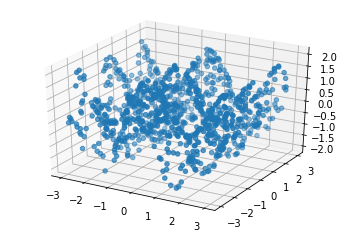

In [7]:
#plotting the figgure 
fig  = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1], Y)

In [9]:
tf

<module 'tensorflow' from '/usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py'>

In [0]:
#Building the model
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
                                   tf.keras.layers.Dense(1)
])

In [0]:
#Compiling and Fitting the model
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')

In [15]:
r = model.fit(X,Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 482us/sample - loss: 0.9023
Epoch 2/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.8661
Epoch 3/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.8480
Epoch 4/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.8530
Epoch 5/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.8174
Epoch 6/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.7848
Epoch 7/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.7585
Epoch 8/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.7091
Epoch 9/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.7122
Epoch 10/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.6441
Epoch 11/100
1000/1000 [==============================] - 0s 52us/sample - loss: 0.5925
Epoch 12/100
1000/

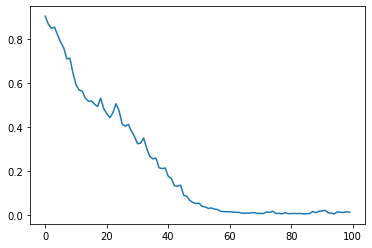

In [17]:
plt.plot(r.history['loss'], label='Test loss')

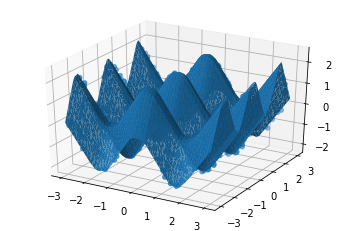

In [24]:
#plotting predicted surface
fig  = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1], Y)


line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True)
plt.show()

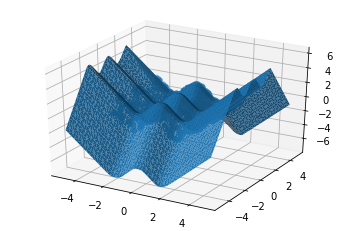

In [25]:
#Checking extrapolation
fig  = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1], Y)


line = np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True)
plt.show()